In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("titanic.csv")

In [3]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [4]:
X = df[:,1:]
Y = df[:,0]

In [5]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=12,input_dim=4,
                kernel_initializer='uniform', 
                activation='relu'))

In [9]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2,callbacks=[early_stopping])

Train on 941 samples, validate on 105 samples
Epoch 1/30
 - 0s - loss: 0.6883 - acc: 0.7014 - val_loss: 0.6835 - val_acc: 0.6952
Epoch 2/30
 - 0s - loss: 0.6752 - acc: 0.7120 - val_loss: 0.6687 - val_acc: 0.6857
Epoch 3/30
 - 0s - loss: 0.6525 - acc: 0.7545 - val_loss: 0.6478 - val_acc: 0.7048
Epoch 4/30
 - 0s - loss: 0.6191 - acc: 0.7577 - val_loss: 0.6243 - val_acc: 0.7333
Epoch 5/30
 - 0s - loss: 0.5827 - acc: 0.7811 - val_loss: 0.6010 - val_acc: 0.7143
Epoch 6/30
 - 0s - loss: 0.5491 - acc: 0.7800 - val_loss: 0.5820 - val_acc: 0.7238
Epoch 7/30
 - 0s - loss: 0.5213 - acc: 0.7779 - val_loss: 0.5702 - val_acc: 0.7238
Epoch 8/30
 - 0s - loss: 0.5016 - acc: 0.7768 - val_loss: 0.5604 - val_acc: 0.7333
Epoch 9/30
 - 0s - loss: 0.4883 - acc: 0.7768 - val_loss: 0.5541 - val_acc: 0.7238
Epoch 10/30
 - 0s - loss: 0.4800 - acc: 0.7758 - val_loss: 0.5530 - val_acc: 0.7238
Epoch 11/30
 - 0s - loss: 0.4743 - acc: 0.7790 - val_loss: 0.5494 - val_acc: 0.7238
Epoch 12/30
 - 0s - loss: 0.4705 - acc:

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

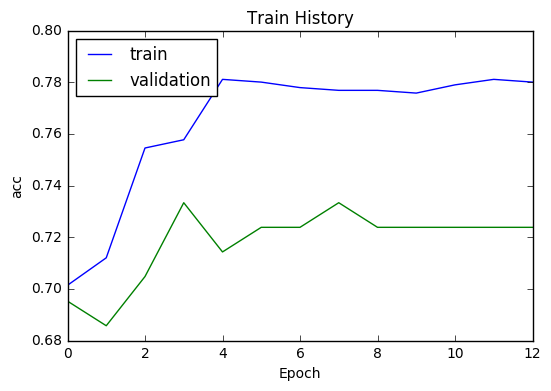

In [14]:
show_train_history(train_history,'acc','val_acc')

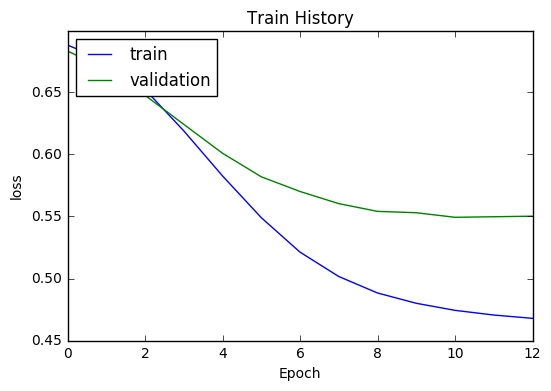

In [15]:
show_train_history(train_history,'loss','val_loss')

In [16]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 66us/step


In [17]:
scores[1]

0.7595419842778272